## Example notebook for inspecting campbellsci files

In [48]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import mpld3, mpld3.plugins as plugins

%matplotlib inline
mpld3.enable_notebook()

In [49]:
path = 'C:/Users/Julia/work/LoggerNet/'
datafiles=['CR1000_Table1.dat',
           'CR1000_Table2.dat',
           'CR5000_onemin.dat',
           'CR5000_flux.dat',
           'CL06_CR1000_IP_Table1.dat',
           'Wash_Strm_CR200_IP_Table1.dat',
           'Upper WS CR200_Table1.dat'
          ]

In [61]:
def read_campbellsci(path, datafile):
    filename = path + datafile
    df = pd.read_csv(filename, skiprows=[0,2,3], index_col=0, parse_dates=True, low_memory=True)
    f = open(filename, 'r')
    lines = f.readlines()
    f.close()
    UnitsLine = lines[2]
    
    units = UnitsLine.replace('"','').split(',')
    if len(df)>60*24*3:
        df = df.resample('1H', how='mean')
    return df, units[1:]

def select_param(datafile):
    global df
    global units
    df, units = read_campbellsci(path, datafile)
    paramW.options = list(df.columns)

def plot_param(param):
    global df
    global units
    fig, ax = plt.subplots()
    df[param].plot(figsize=(10,5), marker='o', ax=ax)
    ax.set_ylabel(units[df.columns.get_loc(param)])
    plt.title(param + ' (time in UTC)')

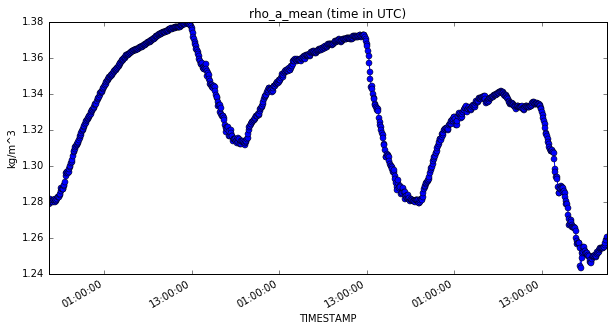

In [62]:
scW = widgets.Select(options=datafiles)
init = scW.value
paramW = widgets.Select(options=[])
i = widgets.interactive(select_param, datafile=scW)
j = widgets.interactive(plot_param, param=paramW)
display(i)
display(j)

In [63]:
def read_campbellsci(path, datafile):
    filename = path + datafile
    df = pd.read_csv(filename, skiprows=[0,2,3], index_col=0, parse_dates=True, low_memory=False)
    f = open(filename, 'r')
    lines = f.readlines()
    f.close()
    UnitsLine = lines[2]
    
    units = UnitsLine.replace('"','').split(',')[1:]
    # resample for large sets
    return df, units

In [64]:
df_all = None
for f in os.listdir(path):
    if 'CR5000_flux' in f and f.endswith('.dat'):
        df, units = read_campbellsci(path, datafile=f)
        df_all = pd.concat((df_all, df))


In [55]:
df, units = read_campbellsci(path, datafile='CR1000_Table1.dat')

In [65]:
param = 'rho_a_mean'

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
df_all[param].plot(marker='o', ax=ax)
plt.ylabel(units[df_all.columns.get_loc(param)])
plt.xlabel(param)
plt.title(param + ' (time in UTC)')
json01 = json.dumps(mpld3.fig_to_dict(fig))
mpld3.display(fig)

In [73]:
json01.replace(json01[json01.find("height"):json01.find("height")+30], '"height": height, "width": width')

'{"axes": [{"xlim": [735922.76388888888, 735970.90972222225], "yscale": "linear", "axesbg": "#FFFFFF", "texts": [{"v_baseline": "hanging", "h_anchor": "middle", "color": "#000000", "text": "rho_a_mean", "coordinates": "axes", "zorder": 3, "alpha": 1, "fontsize": 10.0, "position": [0.5, -0.16193527987453687], "rotation": -0.0, "id": "el10312212268256"}, {"v_baseline": "auto", "h_anchor": "middle", "color": "#000000", "text": "kg/m^3", "coordinates": "axes", "zorder": 3, "alpha": 1, "fontsize": 10.0, "position": [-0.070564516129032251, 0.5], "rotation": -90.0, "id": "el10312214369056"}, {"v_baseline": "auto", "h_anchor": "middle", "color": "#000000", "text": "rho_a_mean (time in UTC)", "coordinates": "axes", "zorder": 3, "alpha": 1, "fontsize": 12.0, "position": [0.5, 1.0165343915343916], "rotation": -0.0, "id": "el10312197564232"}], "zoomable": true, "images": [], "xdomain": [[2015, 10, 20, 18, 20, 0, 0.0], [2016, 0, 7, 21, 50, 0, 0.0]], "ylim": [1.1500000000000001, 1.4000000000000001],

In [24]:
d = mpld3.fig_to_dict(fig)

In [33]:
d.update({'height':10})

In [34]:
d

{'axes': [{'axes': [{'fontsize': 10.0,
     'grid': {'gridOn': False},
     'nticks': 6,
     'position': 'bottom',
     'scale': u'linear',
     'tickformat': None,
     'tickvalues': None},
    {'fontsize': 10.0,
     'grid': {'gridOn': False},
     'nticks': 9,
     'position': 'left',
     'scale': u'linear',
     'tickformat': None,
     'tickvalues': None}],
   'axesbg': '#FFFFFF',
   'axesbgalpha': None,
   'bbox': (0.125, 0.125, 0.77500000000000002, 0.77500000000000002),
   'collections': [],
   'id': 'el10312223290424',
   'images': [],
   'lines': [{'alpha': 1,
     'color': '#000000',
     'coordinates': 'data',
     'dasharray': '10,0',
     'data': 'data01',
     'id': 'el10312221590752',
     'linewidth': 1.0,
     'xindex': 0,
     'yindex': 1,
     'zorder': 2}],
   'markers': [{'alpha': 1,
     'coordinates': 'data',
     'data': 'data01',
     'edgecolor': '#000000',
     'edgewidth': 0.5,
     'facecolor': '#000000',
     'id': 'el10312221590752pts',
     'markerpath

In [13]:
import json

# ... create matplotlib figure

json01 = json.dumps(mpld3.fig_to_dict(fig))

NameError: name 'fig' is not defined

In [47]:
json01.replace('"height": 320.0, "width": 480.0', '"height": height, "width": width')

'{"axes": [{"xlim": [0.0, 5.0], "yscale": "linear", "axesbg": "#FFFFFF", "texts": [], "zoomable": true, "images": [], "xdomain": [0.0, 5.0], "ylim": [1.0, 9.0], "paths": [], "sharey": [], "sharex": [], "axesbgalpha": null, "axes": [{"scale": "linear", "tickformat": null, "grid": {"gridOn": false}, "fontsize": 10.0, "position": "bottom", "nticks": 6, "tickvalues": null}, {"scale": "linear", "tickformat": null, "grid": {"gridOn": false}, "fontsize": 10.0, "position": "left", "nticks": 9, "tickvalues": null}], "lines": [{"color": "#000000", "yindex": 1, "coordinates": "data", "dasharray": "10,0", "zorder": 2, "alpha": 1, "xindex": 0, "linewidth": 1.0, "data": "data01", "id": "el10312221590752"}], "markers": [{"edgecolor": "#000000", "facecolor": "#000000", "edgewidth": 0.5, "yindex": 1, "coordinates": "data", "zorder": 2, "markerpath": [[[-3.0, 3.0], [3.0, 3.0], [3.0, -3.0], [-3.0, -3.0]], ["M", "L", "L", "L", "Z"]], "alpha": 1, "xindex": 0, "data": "data01", "id": "el10312221590752pts"}]

In [44]:
json01[1160:]

'ight": 320.0, "width": 480.0, "plugins": [{"type": "reset"}, {"enabled": false, "button": true, "type": "zoom"}, {"enabled": false, "button": true, "type": "boxzoom"}], "data": {"data01": [[0.0, 3.0], [1.0, 1.0], [2.0, 4.0], [3.0, 1.0], [4.0, 5.0], [5.0, 9.0]]}, "id": "el10312221591200"}'